In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool' = False, date_parser=<no_default>, date_format: 'str

In [3]:
data=pd.read_csv('/Users/rishismac/Downloads/Online+Retail.csv',encoding='ISO-8859-1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
data.info()
list(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [5]:
cols=list(data.columns)
for col in cols:
    if data[col].dtype!='O':
        print(col,':num')
    else:
        print(col,':cat')

InvoiceNo :cat
StockCode :cat
Description :cat
Quantity :num
InvoiceDate :cat
UnitPrice :num
CustomerID :num
Country :cat


In [6]:
num_variables=[col for col in list(data.columns)  if data[col].dtype!='O' ]
cat_variables=[col for col in list(data.columns)  if data[col].dtype=='O' ]

In [7]:
round(data.isna().sum()/len(data)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
help(data.dropna)

Help on method dropna in module pandas.core.frame:

dropna(*, axis: 'Axis' = 0, how: 'AnyAll | NoDefault' = <no_default>, thresh: 'int | NoDefault' = <no_default>, subset: 'IndexLabel' = None, inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        Pass tuple or list to drop on multiple axes.
        Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame

In [9]:
data=data.dropna()


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
data['amount']=data['UnitPrice']*data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


## Data Preparation:
- Recency: Number days since the most recent order made by customer
- Frequency: Total orders made by a customer in a year
- Monetary: Total amount ordered by a customer

## We need data grouping by customer so that we can cluster the data
- First we need to groupby. and there are two ways in which we can do so:
    - Group the entire data on the basis of sometype of aggregation like sum,count,mean etc and 
    it willl apply the same chosen aggregate on each column of the dataframe
    - We can create seperate grouped dataframes of mixture of aggregates
    ,like sum for one coumn and count for the other etc and merge them later.
- In the syntax of groupby first we provide the column on which we need to group,
  followed by the column which we want to aggregate and finally how we want to aggregate
- Note that for each grouping we need to reset the index as the grouping variable is the default index
- Finally do an inner join of all dataframes one after the other to get the final grouped dataframe
  to continue with clustering.

In [12]:

grouped_df=data.groupby('CustomerID')['amount'].sum()
grouped_df=grouped_df.reset_index()
grouped_df

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [13]:
frequency=data.groupby('CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','frequency']
#Steps for merging: left df,  rightdf , on column.    , how to merge :
grouped_df=pd.merge(grouped_df,frequency,on='CustomerID',how='inner')

grouped_df

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


## Recency:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [15]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    This function converts a scalar, array-like, :class:`Series` or
    :class:`DataFrame`/dict-like to a pandas datetime object.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime. If a :class:`DataFrame` is provided, the
        method expects minimally the following columns: :const:`"year"`,
        :const:`"mon

In [16]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [17]:
import datetime as dt

In [18]:
max_date=data['InvoiceDate'].max()
data['diff']=max_date-data['InvoiceDate']
# Using the datetime module to extract only the number of days:
data['recency']=data['diff'].dt.days


In [19]:
recency=data.groupby('CustomerID')['recency'].min()
recency=recency.reset_index()
grouped_df=pd.merge(grouped_df,recency,on='CustomerID',how='inner')
grouped_df

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


## Outlier Treatment:

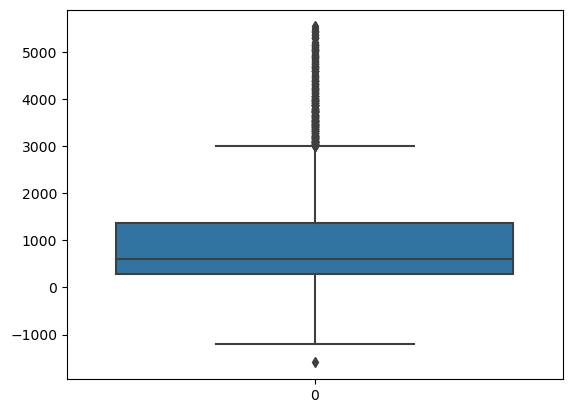

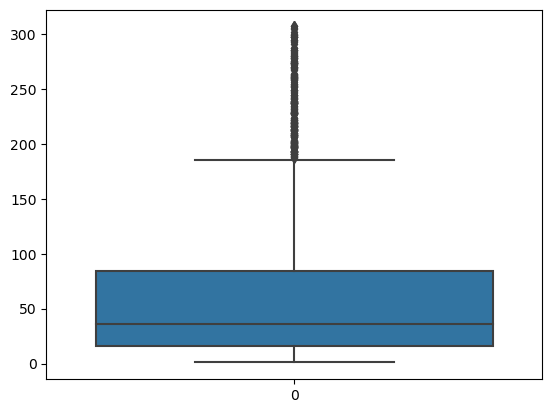

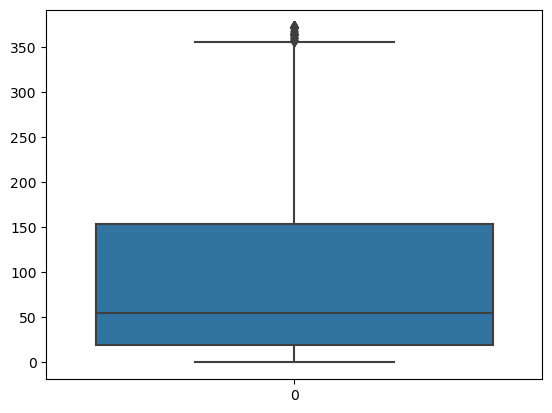

In [20]:

#amount:
amount_arr=np.array(grouped_df['amount'])
uq=np.percentile(amount_arr,75)
lq=np.percentile(amount_arr,25)
iqr=uq-lq
ul=uq+(3*iqr)
ll=lq-(3*iqr)
grouped_df=grouped_df[(grouped_df['amount']<ul) & (grouped_df['amount']>ll)]
sns.boxplot(grouped_df['amount'])
plt.show()


#frequency:
amount_arr=np.array(grouped_df['frequency'])
uq=np.percentile(amount_arr,75)
lq=np.percentile(amount_arr,25)
iqr=uq-lq
ul=uq+(3*iqr)
ll=lq-(3*iqr)
grouped_df=grouped_df[(grouped_df['frequency']<ul) & (grouped_df['frequency']>ll)]
sns.boxplot(grouped_df['frequency'])
plt.show()


#recency:
amount_arr=np.array(grouped_df['recency'])
uq=np.percentile(amount_arr,75)
lq=np.percentile(amount_arr,25)
iqr=uq-lq
ul=uq+(3*iqr)
ll=lq-(3*iqr)
grouped_df=grouped_df[(grouped_df['recency']<ul) & (grouped_df['recency']>ll)]
sns.boxplot(grouped_df['recency'])
plt.show()


## Scaling:


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
final_data=grouped_df[['amount','frequency','recency']]
scaled_data_np=scaler.fit_transform(final_data)

scaled_data_df=pd.DataFrame(scaled_data_np,columns=['amount','frequency','recency'])
scaled_data_df

,amount,frequency,recency
0,-0.930802,-0.934461,2.231057
1,3.244889,1.975663,-0.941740
2,0.810432,-0.465608,-0.226882
3,0.771979,0.213421,-0.775267
4,-0.606823,-0.691951,2.074376
...,...,...,...
4025,-0.762321,-0.821289,-0.236674
4026,-0.755830,-0.805122,1.761013
4027,-0.852501,-0.853624,0.811132
4028,-0.759705,-0.756620,-0.882985


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
hopkins(scaled_data_df) 

0.9133303631098689

### The above value clearly shows that the data is highly cluster-able

## Modellling:

In [24]:
from sklearn.cluster import KMeans
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to t

In [25]:
kmeans=KMeans(n_clusters=4,max_iter=200,verbose=1)
kmeans.fit(scaled_data_df)
centers=kmeans.cluster_centers_
labels=kmeans.labels_


Initialization complete
Iteration 0, inertia 4519.234675968662.
Iteration 1, inertia 3523.2276507477427.
Iteration 2, inertia 3312.9305793482845.
Iteration 3, inertia 3205.162562240578.
Iteration 4, inertia 3145.250868109615.
Iteration 5, inertia 3110.900926578397.
Iteration 6, inertia 3092.5370023697155.
Iteration 7, inertia 3081.086822640095.
Iteration 8, inertia 3072.8498148196195.
Iteration 9, inertia 3066.588888159268.
Iteration 10, inertia 3064.4338017652954.
Iteration 11, inertia 3063.3614048019754.
Iteration 12, inertia 3062.445183298894.
Iteration 13, inertia 3061.632756693758.
Iteration 14, inertia 3060.944534602125.
Iteration 15, inertia 3060.252698192491.
Iteration 16, inertia 3059.1503435467894.
Iteration 17, inertia 3058.297689433654.
Iteration 18, inertia 3057.5490003685254.
Iteration 19, inertia 3057.0338669158527.
Iteration 20, inertia 3056.817994340066.
Converged at iteration 20: center shift 6.843428455124287e-05 within tolerance 9.999999999999965e-05.


In [27]:
centers

array([[-0.58815863, -0.59524564,  1.56131666],
       [-0.42037063, -0.46499533, -0.43217634],
       [ 0.58119302,  0.77756751, -0.56425439],
       [ 2.33788026,  2.13193232, -0.66837304]])

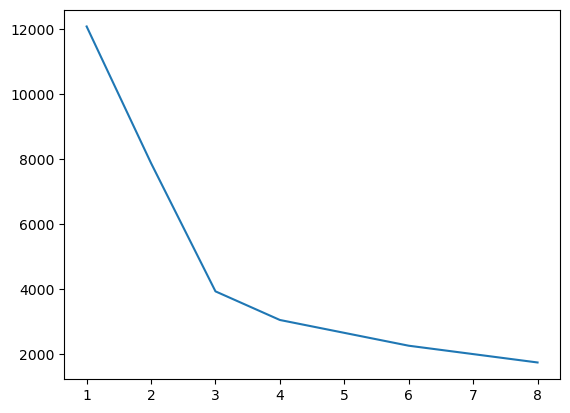

In [28]:
clusters=[1,2,3,4,6,8]
ssd=[]
for i in clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(scaled_data_df)
    ssd.append(kmeans.inertia_)
sns.lineplot(x=clusters,y=ssd)
plt.show()

    

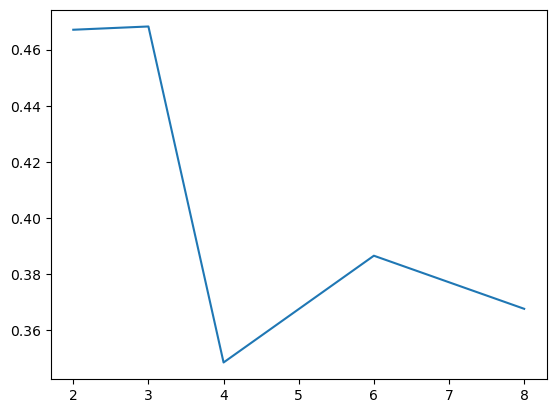

In [29]:
from sklearn.metrics import silhouette_score
silhoutte=[]
clusters=[2,3,4,6,8]

for i in clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(scaled_data_df)
    score=silhouette_score(scaled_data_df,kmeans.labels_)
    silhoutte.append(score)
sns.lineplot(x=clusters,y=silhoutte)
plt.show()

In [30]:
kmeans=KMeans(n_clusters=3,max_iter=200)
kmeans.fit(scaled_data_df)
centers=kmeans.cluster_centers_
labels=kmeans.labels_
grouped_df['labels']=labels
grouped_df

,CustomerID,amount,frequency,recency,labels
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,2
4367,18280.0,180.60,10,277,0
4368,18281.0,80.82,7,180,0
4369,18282.0,176.60,13,7,2


In [31]:
import plotly.express as px

fig = px.scatter_3d(grouped_df, x='amount', y='frequency', z='recency',color=labels)

fig.show()

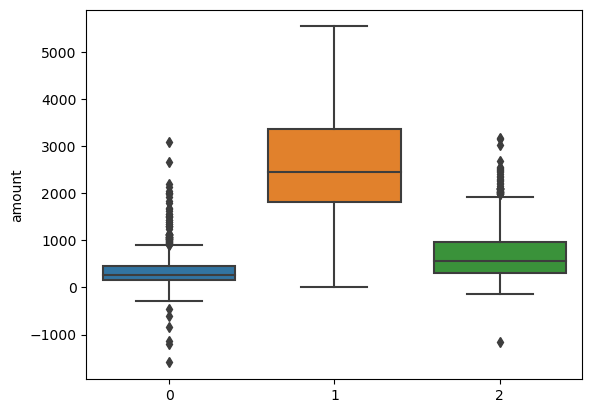

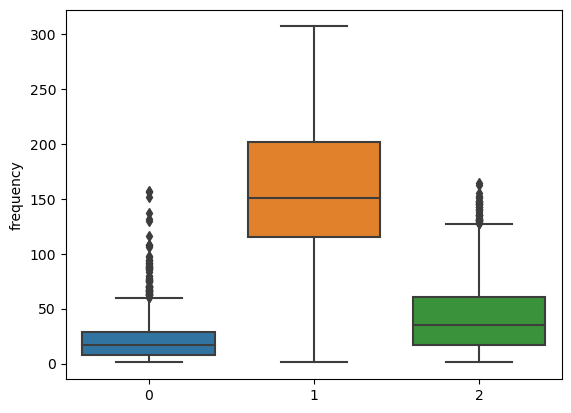

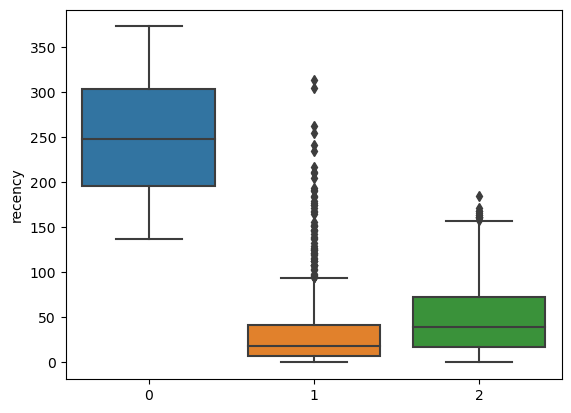

In [40]:
for i in grouped_df.columns:
    if i=='CustomerID' or i=='labels':
        continue
    else:
        sns.boxplot(x=labels,y=grouped_df[i])
        plt.show()
        